## Import

In [1]:
%pylab 

import os
import skimage.io
from glob import glob
import scipy
from tifffile import imread
import matplotlib.pyplot as plt
import scipy.ndimage
import skfmm
from cellpose import dynamics


%load_ext autoreload
%autoreload 2

%config IPCompleter.greedy=True

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## Experimenting with demo data

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


/home/lis-paul/miniconda3/envs/cellpose/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


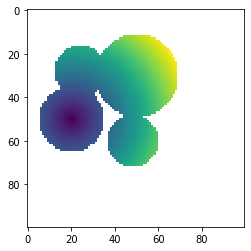

In [3]:
%pylab
%matplotlib inline
from scipy.ndimage.morphology import distance_transform_edt
l = 100
x, y = np.indices((l, l))
center1 = (50, 20)
center2 = (28, 24)
center3 = (30, 50)
center4 = (60,48)
radius1, radius2, radius3, radius4 = 15, 12, 19, 12
circle1 = (x - center1[0])**2 + (y - center1[1])**2 < radius1**2
circle2 = (x - center2[0])**2 + (y - center2[1])**2 < radius2**2
circle3 = (x - center3[0])**2 + (y - center3[1])**2 < radius3**2
circle4 = (x - center4[0])**2 + (y - center4[1])**2 < radius4**2
# 3 circles
img = circle1 + circle2 + circle3 + circle4
mask = ~img.astype(bool)
img = img.astype(float)
m = ones_like(img)
m[center1] = 0
#imshow(distance_transform_edt(m), interpolation='nearest')
m = ma.masked_array(distance_transform_edt(m), mask)
imshow(m, interpolation='nearest')

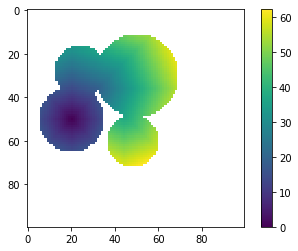

In [4]:
def geodesic_distance_transform(m):
    mask = m.mask
    visit_mask = mask.copy() # mask visited cells
    m = m.filled(numpy.inf)
    m[m!=0] = numpy.inf
    distance_increments = numpy.asarray([sqrt(2), 1., sqrt(2), 1., 1., sqrt(2), 1., sqrt(2)])
    connectivity = [(i,j) for i in [-1, 0, 1] for j in [-1, 0, 1] if (not (i == j == 0))]
    cc = unravel_index(m.argmin(), m.shape) # current_cell
    while (~visit_mask).sum() > 0:
        neighbors = [tuple(e) for e in asarray(cc) - connectivity 
                     if not visit_mask[tuple(e)]]
        tentative_distance = [distance_increments[i] for i,e in enumerate(asarray(cc) - connectivity) 
                              if not visit_mask[tuple(e)]]
        for i,e in enumerate(neighbors):
            d = tentative_distance[i] + m[cc]
            if d < m[e]:
                m[e] = d
        visit_mask[cc] = True
        m_mask = ma.masked_array(m, visit_mask)
        cc = unravel_index(m_mask.argmin(), m.shape)
    return m

gdt = geodesic_distance_transform(m)
imshow(gdt, interpolation='nearest')
colorbar()

In [5]:
type(m)

numpy.ma.core.MaskedArray

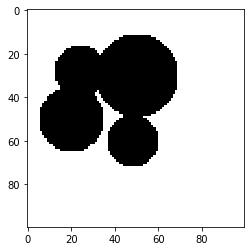

In [6]:
plt.imshow(m.mask, cmap='gray')

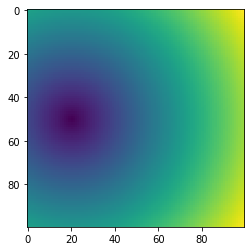

In [7]:
%matplotlib qt
plt.imshow(m.data)

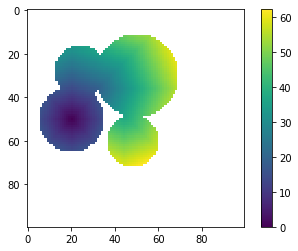

In [8]:
gdt = geodesic_distance_transform(m)
imshow(gdt, interpolation='nearest')
colorbar()

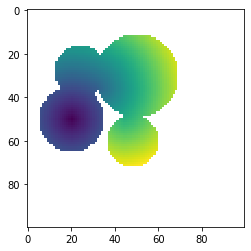

In [9]:
import skfmm
distance = skfmm.distance(m)
plt.imshow(distance)

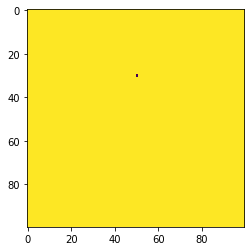

In [10]:
m = ones_like(img)
m[30, 50] = 0
plt.imshow(m)

## Load cell label dataset

In [2]:
# del Y,X

# HOME = '/home/qzt'
HOME = '/home/lis-paul'
# HOME = '/Users/qzt'
# PATH = "data/dsb2018/dsb2018_sub1/"
PATH = "data/centuri/train/"
# PATH = 'cellpose/'
# path = os.path.join(HOME, "data/dsb2018/dsb2018_sub1/images/*.tif")
pathX = os.path.join(HOME, PATH+"images/*.tif")
pathY = os.path.join(HOME, PATH+"masks/*.tif")
X_file = sorted(glob(pathX))
Y_file = sorted(glob(pathY))

X = list(map(imread,X_file))
Y = list(map(imread,Y_file))
print(len(X), len(Y))

5 5


(1022, 1022)


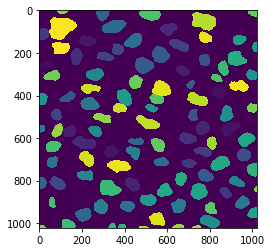

In [3]:
%matplotlib inline
print(Y[0].shape)
plt.imshow(Y[0])

## Test the centroid and geodesics distance function with overlapping mask labels

In [3]:
Y[0].shape

(1022, 1022)

0 (slice(858, 920, None), slice(165, 232, None))


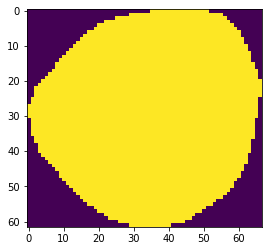

1 (slice(438, 482, None), slice(123, 181, None))


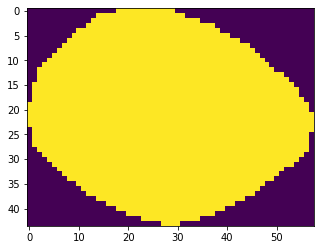

2 (slice(236, 277, None), slice(0, 67, None))


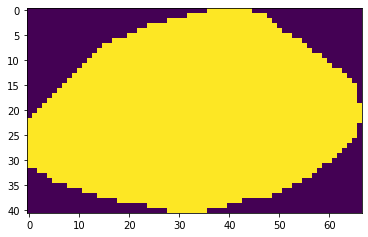

3 (slice(357, 416, None), slice(808, 877, None))


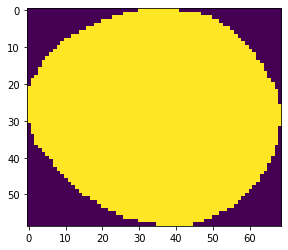

4 (slice(523, 596, None), slice(853, 945, None))


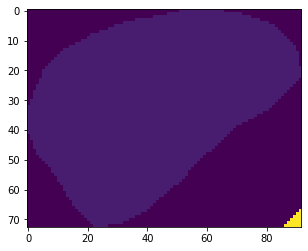

5 (slice(634, 692, None), slice(306, 374, None))


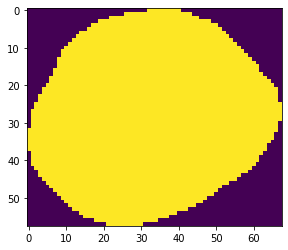

6 (slice(119, 170, None), slice(186, 270, None))


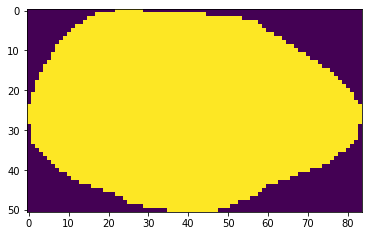

7 (slice(538, 597, None), slice(114, 174, None))


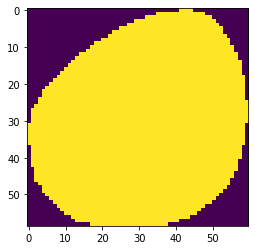

8 (slice(260, 311, None), slice(643, 707, None))


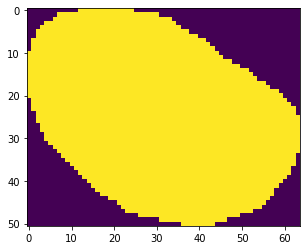

9 (slice(784, 852, None), slice(403, 474, None))


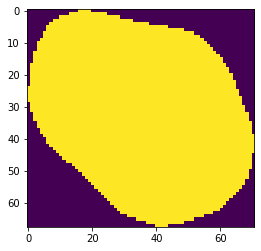

10 (slice(519, 588, None), slice(734, 801, None))


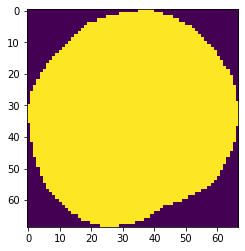

11 (slice(590, 653, None), slice(155, 268, None))


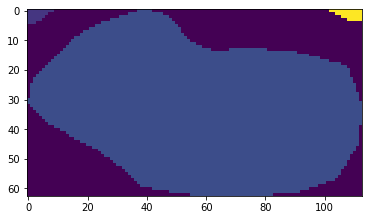

12 (slice(62, 121, None), slice(568, 650, None))


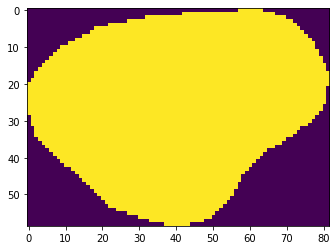

13 (slice(177, 259, None), slice(151, 205, None))


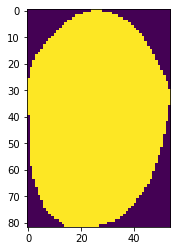

14 (slice(574, 627, None), slice(658, 742, None))


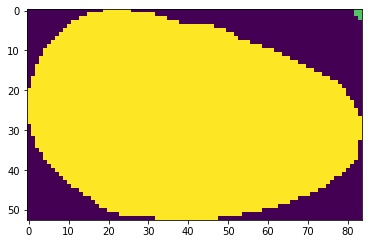

15 (slice(699, 741, None), slice(669, 740, None))


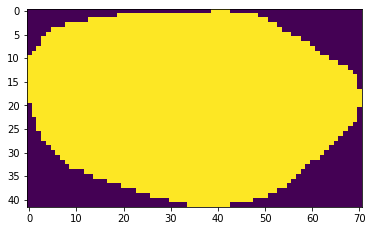

16 (slice(828, 884, None), slice(846, 906, None))


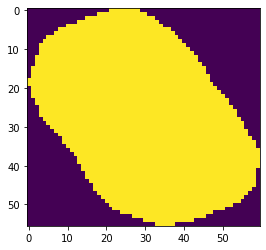

17 (slice(84, 141, None), slice(0, 49, None))


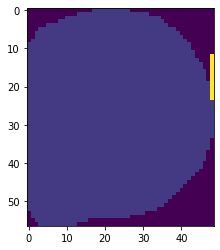

18 (slice(640, 689, None), slice(725, 811, None))


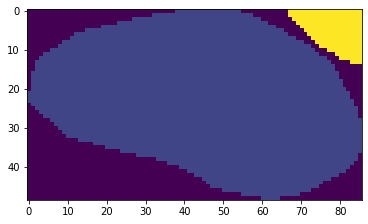

19 (slice(136, 197, None), slice(610, 704, None))


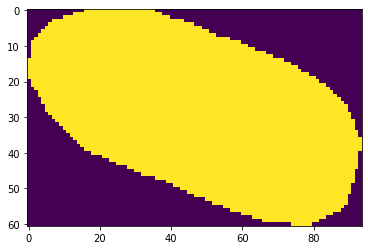

20 (slice(194, 238, None), slice(270, 354, None))


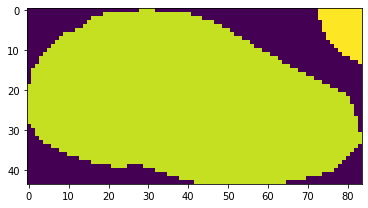

21 (slice(462, 518, None), slice(57, 106, None))


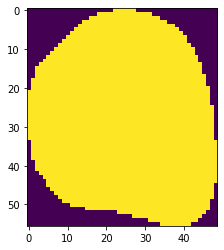

22 (slice(157, 212, None), slice(342, 400, None))


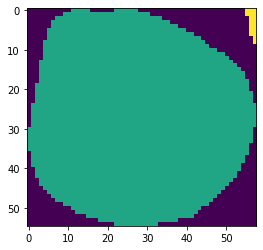

23 (slice(780, 846, None), slice(48, 126, None))


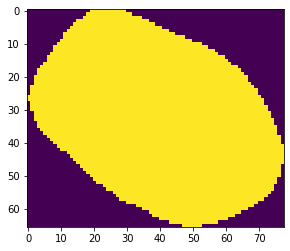

24 (slice(649, 711, None), slice(927, 996, None))


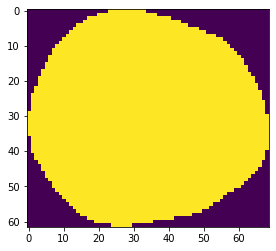

25 (slice(205, 264, None), slice(751, 804, None))


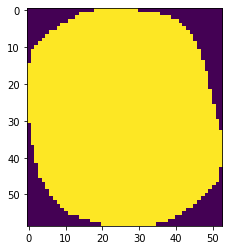

26 (slice(465, 520, None), slice(699, 745, None))


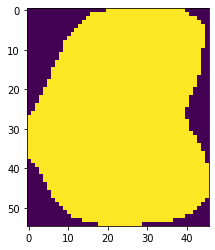

27 (slice(380, 433, None), slice(96, 172, None))


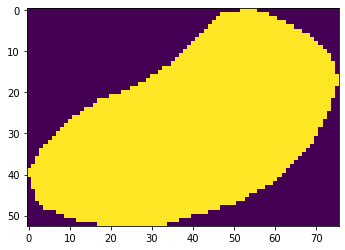

28 (slice(168, 249, None), slice(530, 614, None))


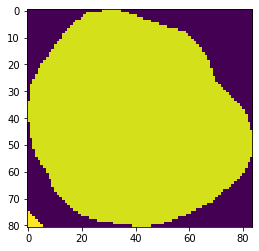

29 (slice(744, 806, None), slice(745, 819, None))


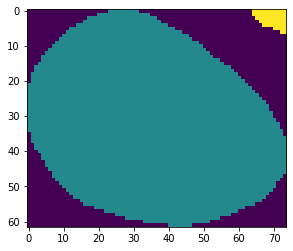

30 (slice(220, 299, None), slice(449, 542, None))


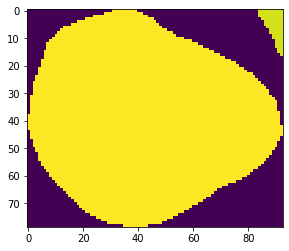

31 (slice(328, 372, None), slice(688, 732, None))


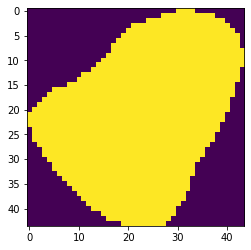

32 (slice(0, 54, None), slice(268, 331, None))


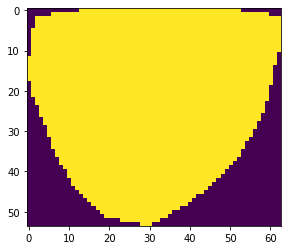

33 (slice(781, 841, None), slice(0, 36, None))


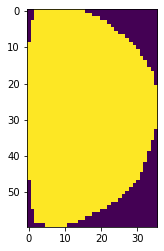

34 (slice(597, 635, None), slice(419, 491, None))


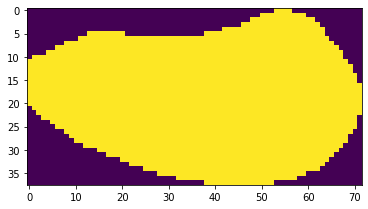

35 (slice(928, 992, None), slice(170, 247, None))


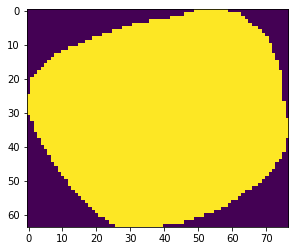

36 (slice(45, 109, None), slice(294, 412, None))


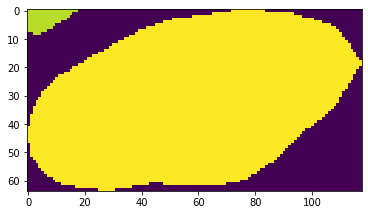

37 (slice(688, 732, None), slice(540, 610, None))


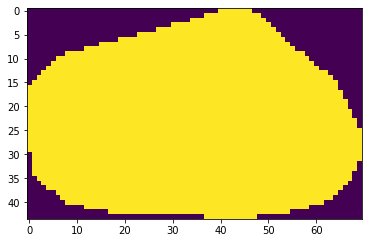

38 (slice(107, 177, None), slice(397, 485, None))


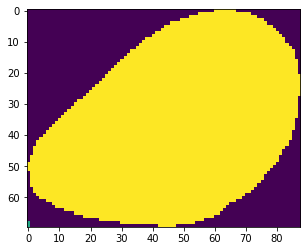

39 (slice(896, 947, None), slice(378, 448, None))


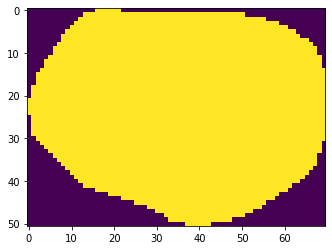

40 (slice(685, 739, None), slice(37, 90, None))


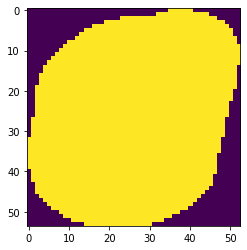

41 (slice(407, 469, None), slice(194, 284, None))


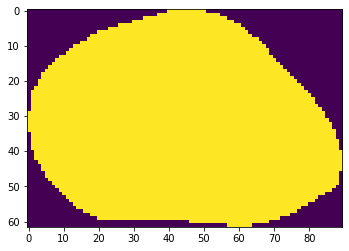

42 (slice(869, 932, None), slice(919, 989, None))


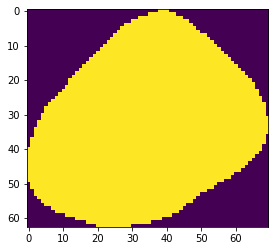

43 (slice(883, 952, None), slice(620, 691, None))


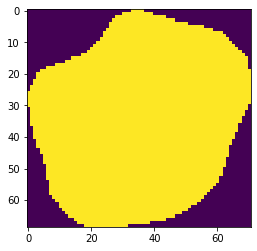

44 (slice(536, 576, None), slice(0, 30, None))


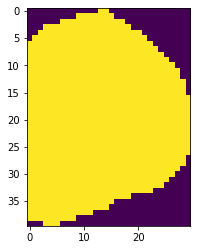

45 (slice(639, 703, None), slice(405, 475, None))


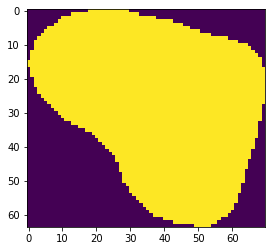

46 (slice(886, 958, None), slice(256, 325, None))


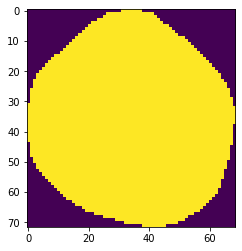

47 (slice(778, 832, None), slice(890, 967, None))


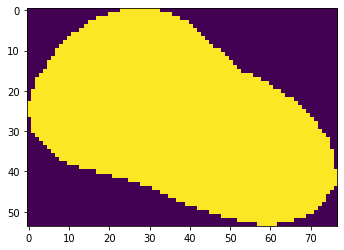

48 (slice(273, 332, None), slice(218, 306, None))


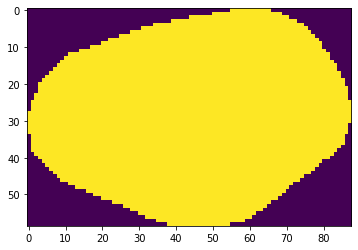

49 (slice(752, 800, None), slice(175, 255, None))


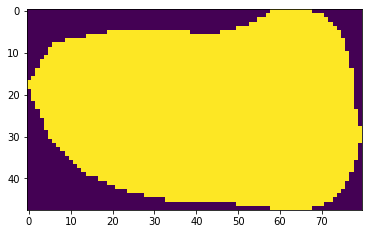

50 (slice(543, 596, None), slice(231, 297, None))


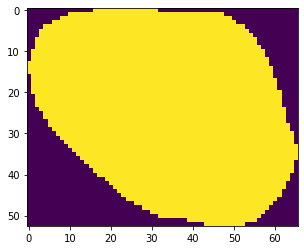

51 (slice(959, 1022, None), slice(753, 850, None))


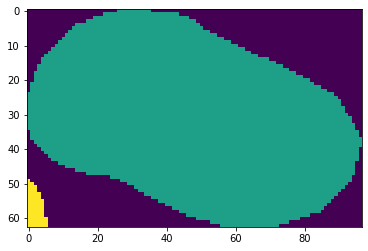

52 (slice(445, 523, None), slice(847, 912, None))


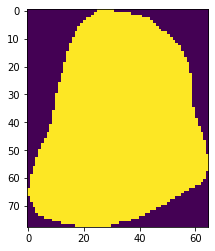

53 (slice(277, 330, None), slice(970, 1022, None))


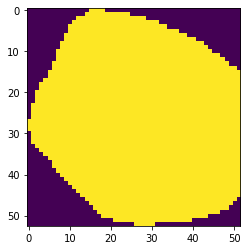

54 (slice(439, 481, None), slice(499, 559, None))


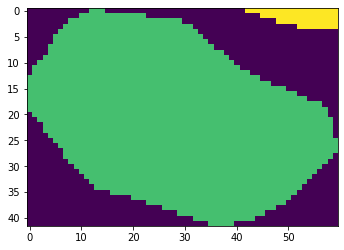

55 (slice(387, 446, None), slice(0, 40, None))


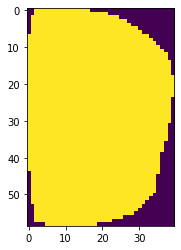

56 (slice(369, 451, None), slice(365, 435, None))


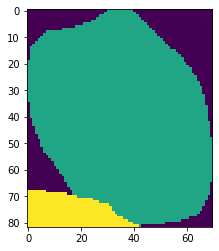

57 (slice(864, 918, None), slice(472, 551, None))


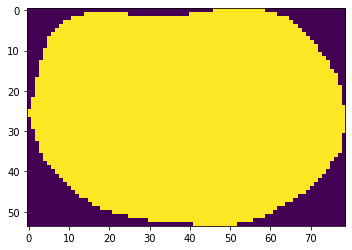

58 (slice(150, 198, None), slice(997, 1022, None))


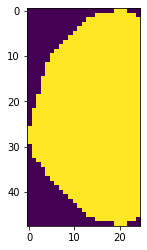

59 (slice(116, 163, None), slice(908, 974, None))


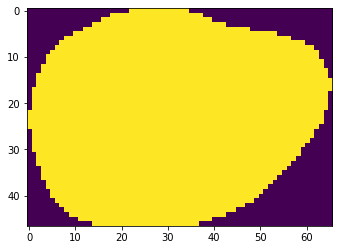

60 (slice(924, 976, None), slice(977, 1022, None))


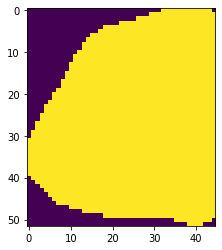

61 (slice(813, 889, None), slice(710, 791, None))


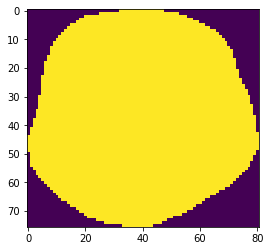

62 (slice(574, 644, None), slice(935, 1016, None))


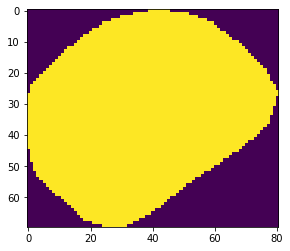

63 (slice(685, 753, None), slice(804, 896, None))


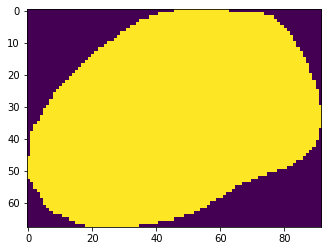

64 (slice(811, 877, None), slice(551, 627, None))


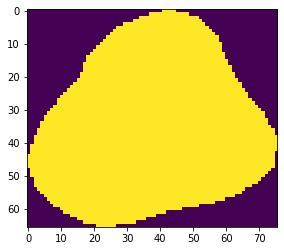

65 (slice(760, 826, None), slice(639, 696, None))


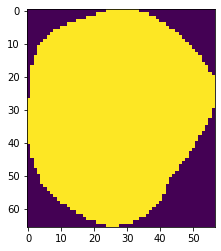

66 (slice(191, 263, None), slice(886, 977, None))


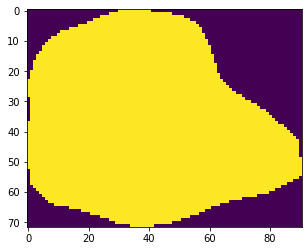

67 (slice(1002, 1022, None), slice(371, 410, None))


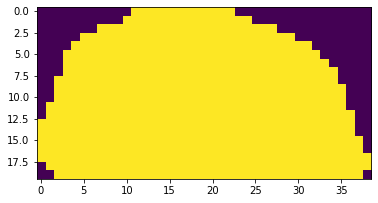

68 (slice(718, 784, None), slice(974, 1022, None))


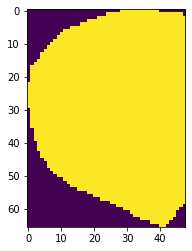

69 (slice(998, 1022, None), slice(325, 360, None))


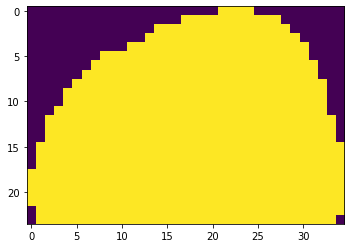

70 (slice(236, 310, None), slice(838, 890, None))


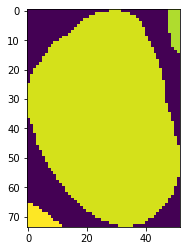

71 (slice(795, 872, None), slice(285, 388, None))


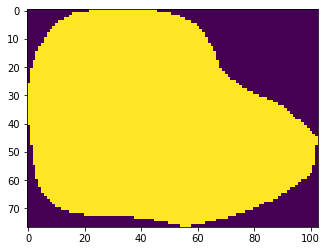

72 (slice(979, 1022, None), slice(106, 174, None))


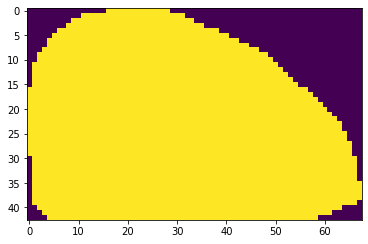

73 (slice(876, 929, None), slice(46, 79, None))


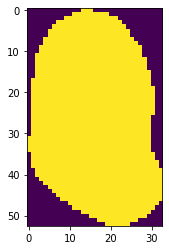

74 (slice(613, 668, None), slice(33, 107, None))


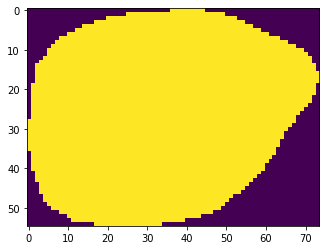

75 (slice(298, 340, None), slice(807, 861, None))


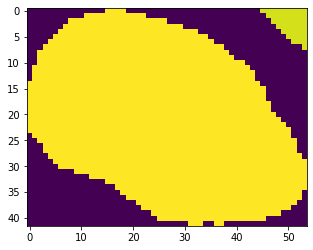

76 (slice(0, 51, None), slice(468, 571, None))


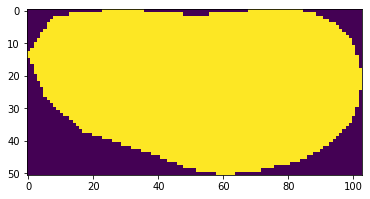

77 (slice(392, 443, None), slice(518, 587, None))


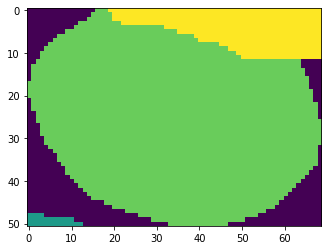

78 (slice(899, 958, None), slice(777, 837, None))


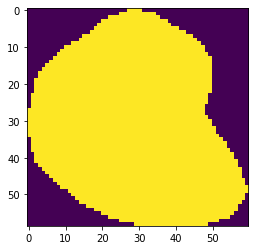

79 (slice(600, 667, None), slice(523, 590, None))


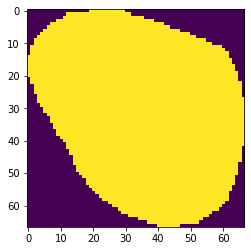

80 (slice(0, 33, None), slice(979, 1022, None))


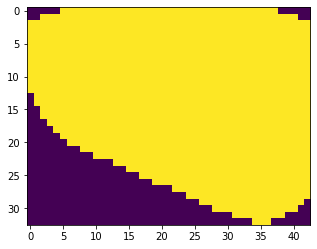

81 (slice(305, 371, None), slice(422, 486, None))


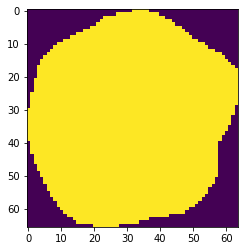

82 (slice(279, 331, None), slice(18, 99, None))


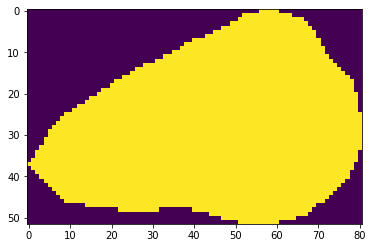

83 (slice(437, 481, None), slice(973, 1022, None))


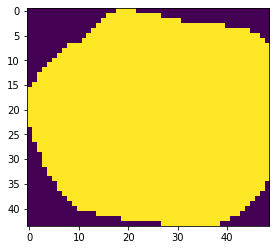

84 (slice(1008, 1022, None), slice(0, 34, None))


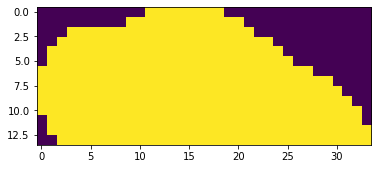

85 (slice(826, 853, None), slice(1008, 1022, None))


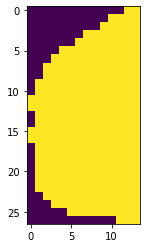

86 (slice(0, 20, None), slice(84, 140, None))


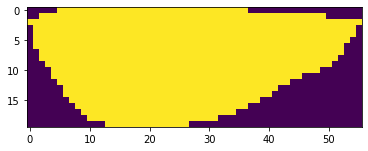

87 (slice(483, 531, None), slice(253, 337, None))


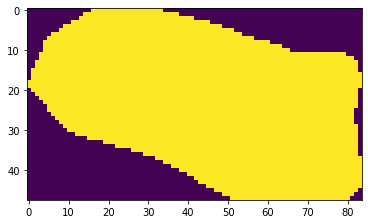

88 (slice(531, 598, None), slice(58, 113, None))


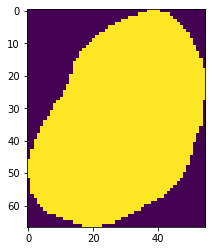

89 (slice(1001, 1022, None), slice(625, 682, None))


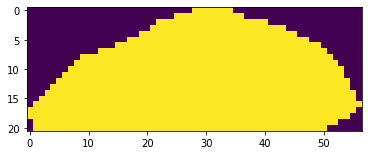

90 (slice(593, 656, None), slice(787, 833, None))


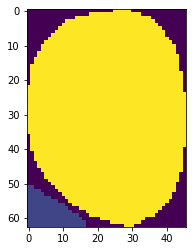

91 (slice(1007, 1022, None), slice(718, 759, None))


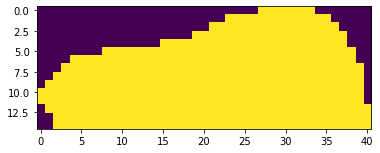

92 (slice(1010, 1022, None), slice(469, 515, None))


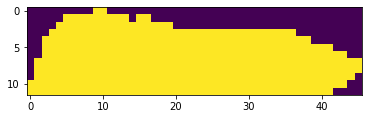

93 (slice(10, 97, None), slice(718, 830, None))


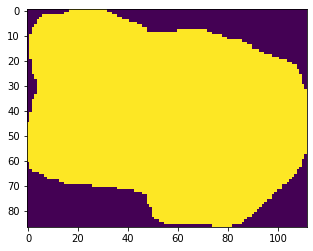

94 (slice(384, 451, None), slice(696, 794, None))


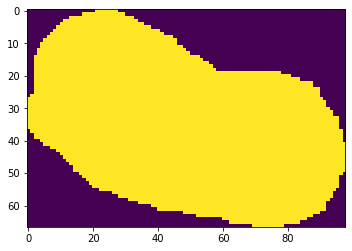

95 (slice(490, 559, None), slice(456, 568, None))


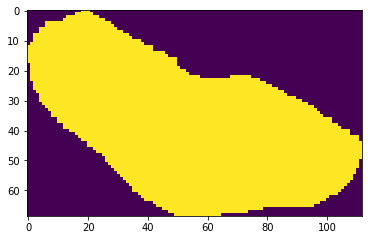

96 (slice(437, 482, None), slice(347, 413, None))


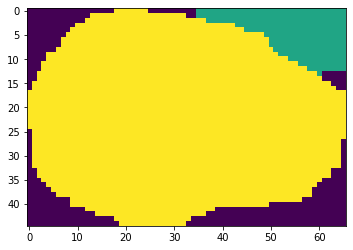

97 (slice(346, 393, None), slice(195, 289, None))


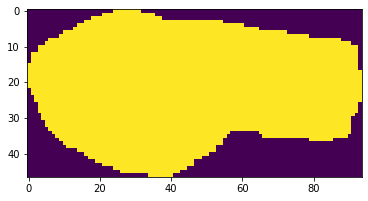

98 (slice(662, 736, None), slice(187, 259, None))


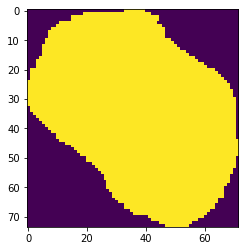

99 (slice(948, 1013, None), slice(514, 591, None))


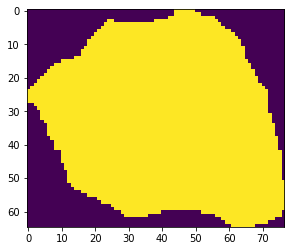

100 (slice(329, 404, None), slice(529, 618, None))


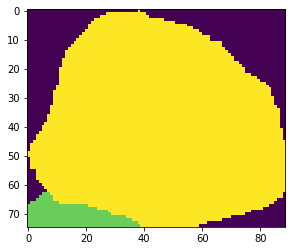

101 (slice(100, 156, None), slice(748, 810, None))


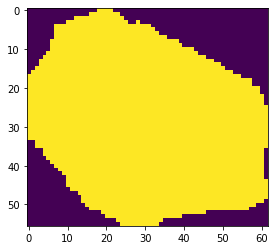

102 (slice(702, 762, None), slice(318, 431, None))


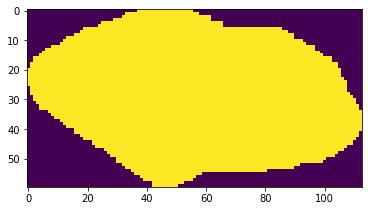

103 (slice(328, 385, None), slice(893, 984, None))


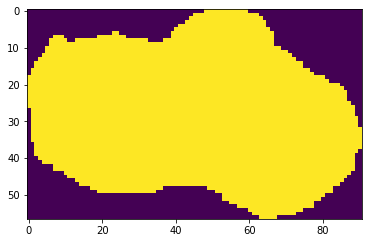

104 (slice(34, 142, None), slice(48, 176, None))


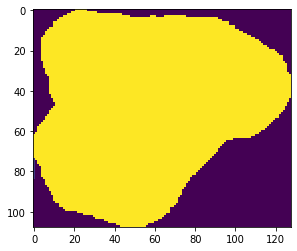

105 (slice(150, 207, None), slice(60, 144, None))


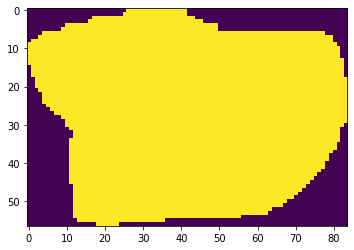

In [29]:
%matplotlib inline
# i = 2
mask = Y[0].copy()
mask.shape
slices = scipy.ndimage.find_objects(mask)
for i,si in enumerate(slices):
# si = slices[i]
#     if si is not None and i in (56,77,96,100):
    if si is not None:
        print(i, si)
        sr,sc = si
        submask = mask[si]
        plt.imshow(submask)
        plt.show()
        m = submask!=(i+1)
#         plt.imshow(m, cmap='gray')

105 (slice(150, 207, None), slice(60, 144, None))


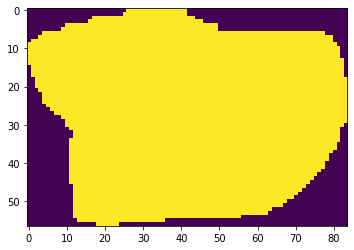

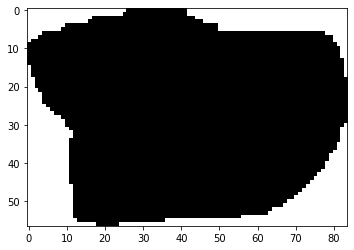

In [11]:
%matplotlib inline

i=105
mask = Y[0].copy()
slices = scipy.ndimage.find_objects(mask)
si = slices[i]
# if si is not None and i in (56,77,96,100):
print(i, si)
sr,sc = si
submask = mask[si]
plt.imshow(submask)
plt.show()
m = submask!=(i+1)
plt.imshow(m, cmap='gray')
plt.show()

### Centroid calculation comparison
little difference between the scipy method and the code used in cellpose

In [ ]:
# unique_items, counts = np.unique(x, return_counts=True)
np.unique(submask, return_counts=True)

In [31]:
centroid = scipy.ndimage.measurements.center_of_mass(submask, labels=submask, index=(i+1))
c = tuple(np.round(np.array(centroid)).astype(int))
print(centroid, c)

(40.548909218859954, 35.42974431151771) (41, 35)


In [ ]:
ly, lx = sr.stop - sr.start + 1, sc.stop - sc.start + 1
y,x = np.nonzero(mask[sr, sc] == (i+1))
y = y.astype(np.int32) + 1
x = x.astype(np.int32) + 1
ymed = np.median(y)
xmed = np.median(x)
imin = np.argmin((x-xmed)**2 + (y-ymed)**2)
xmed = x[imin]
ymed = y[imin]
print(xmed, ymed)

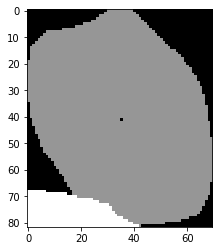

In [32]:
%matplotlib inline
submask[c]=0
plt.imshow(submask, cmap='gray')

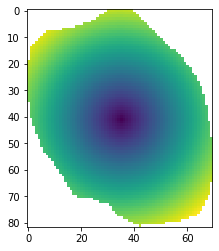

In [33]:
m_submask = ma.masked_array(submask, m)

distance = skfmm.distance(m_submask)

%matplotlib inline
plt.imshow(distance)

## Test for elongated object (which EDT would give backbone without converge to center)

97 (slice(346, 393, None), slice(195, 289, None))


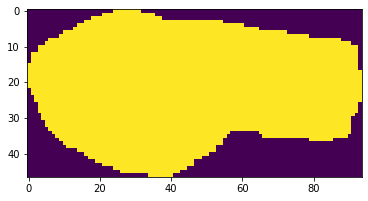

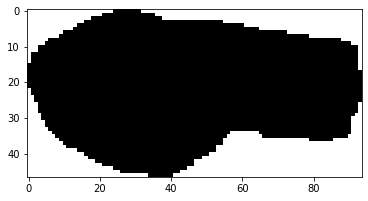

In [34]:
i=97
mask = Y[0].copy()
slices = scipy.ndimage.find_objects(mask)
si = slices[i]
# if si is not None and i in (56,77,96,100):
print(i, si)
sr,sc = si
submask = mask[si]
plt.imshow(submask)
plt.show()
m = submask!=(i+1)
plt.imshow(m, cmap='gray')
plt.show()

### the edt method

In [35]:
import edt
e = edt.edt(submask)

e_dy, e_dx = np.gradient(e)

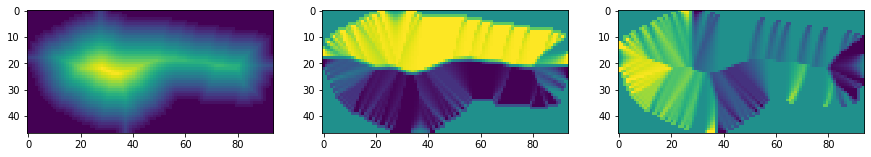

In [36]:
plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(e)
plt.subplot(132)
plt.imshow(e_dy)
plt.subplot(133)
plt.imshow(e_dx)

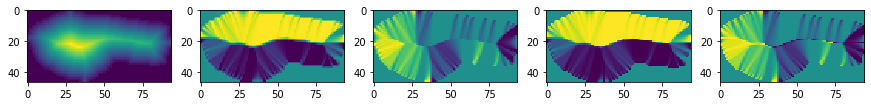

In [37]:
mu = np.stack((e_dy,e_dx))
mu /= (1e-20 + (mu**2).sum(axis=0)**0.5)

plt.figure(figsize=(15,15))
plt.subplot(151)
plt.imshow(e)
plt.subplot(152)
plt.imshow(e_dy)
plt.subplot(153)
plt.imshow(e_dx)
plt.subplot(154)
plt.imshow(mu[0,...])
plt.subplot(155)
plt.imshow(mu[1,...])

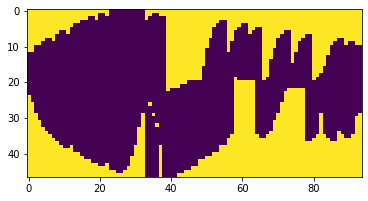

In [38]:
plt.imshow(mu[1,...]==0)

### the cellpose heat diffusion method

In [409]:
i=target
masks = Y[0].copy()
Ly, Lx = masks.shape
mu = np.zeros((2, Ly, Lx), np.float64)
# mu_c = np.zeros((Ly, Lx), np.float64)
# # slices = scipy.ndimage.find_objects(masks)[:1]
slices = scipy.ndimage.find_objects(masks)
print(slices[i])
# dia = utils.diameters(masks)[0]
# s2 = (0.15 * dia)**2
# for i,si in enumerate(slices):
#     if si is not None:
si = slices[i]
sr,sc = si
ly, lx = sr.stop - sr.start + 1, sc.stop - sc.start + 1
y,x = np.nonzero(masks[sr, sc] == (i+1))
y = y.astype(np.int32) + 1
x = x.astype(np.int32) + 1
ymed = np.median(y)
xmed = np.median(x)
imin = np.argmin((x-xmed)**2 + (y-ymed)**2)
xmed = x[imin]
ymed = y[imin]
print(xmed, ymed)

[(slice(858, 920, None), slice(165, 232, None)), (slice(438, 482, None), slice(123, 181, None)), (slice(236, 277, None), slice(0, 67, None)), (slice(357, 416, None), slice(808, 877, None)), (slice(523, 596, None), slice(853, 945, None)), (slice(634, 692, None), slice(306, 374, None)), (slice(119, 170, None), slice(186, 270, None)), (slice(538, 597, None), slice(114, 174, None)), (slice(260, 311, None), slice(643, 707, None)), (slice(784, 852, None), slice(403, 474, None)), (slice(519, 588, None), slice(734, 801, None)), (slice(590, 653, None), slice(155, 268, None)), (slice(62, 121, None), slice(568, 650, None)), (slice(177, 259, None), slice(151, 205, None)), (slice(574, 627, None), slice(658, 742, None)), (slice(699, 741, None), slice(669, 740, None)), (slice(828, 884, None), slice(846, 906, None)), (slice(84, 141, None), slice(0, 49, None)), (slice(640, 689, None), slice(725, 811, None)), (slice(136, 197, None), slice(610, 704, None)), (slice(194, 238, None), slice(270, 354, None)),

In [410]:
from cellpose import dynamics

# mu_c[sr.start+y-1, sc.start+x-1] = np.exp(-d2/s2)

niter = 2*np.int32(np.ptp(x) + np.ptp(y))
T = np.zeros((ly+2)*(lx+2), np.float64)
T = dynamics._extend_centers(T, y, x, ymed, xmed, np.int32(lx), niter)
T[(y+1)*lx + x+1] = np.log(1.+T[(y+1)*lx + x+1])

dy = T[(y+1)*lx + x] - T[(y-1)*lx + x]
dx = T[y*lx + x+1] - T[y*lx + x-1]

print(dy.shape, dx.shape)

(5007,) (5007,)


In [412]:
y

array([ 1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9

In [169]:
DX = np.zeros((ly+2)*(lx+2), np.float64)
DY = np.zeros((ly+2)*(lx+2), np.float64)

T2 = np.zeros((ly,lx), np.float64)
dy2 = np.zeros((ly,lx), np.float64)
dx2 = np.zeros((ly,lx), np.float64)

DX[(y)*lx+(x)] = dx
DY[(y)*lx+(x)] = dy
for yy in range(ly):
    T2[yy,:lx] = T[yy*lx:(yy+1)*lx]
    dy2[yy,:lx] = DY[yy*lx:(yy+1)*lx]
    dx2[yy,:lx] = DX[yy*lx:(yy+1)*lx]
    
mu = np.stack((dy2,dx2))
mu /= (1e-20 + (mu**2).sum(axis=0)**0.5)
mu.shape

(2, 58, 85)

In [170]:
plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(T2)
plt.subplot(132)
plt.imshow(mu[0,...])
plt.subplot(133)
plt.imshow(mu[1,...])

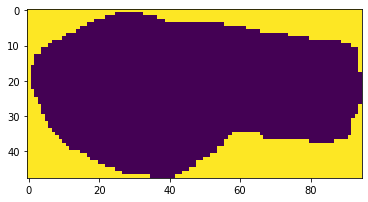

In [42]:
plt.imshow(mu[0,...]==0)

### the geodesics distance method

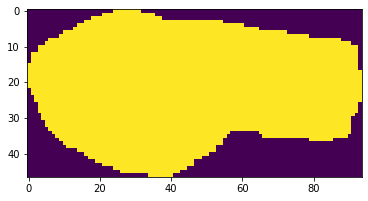

In [43]:
plt.imshow(submask)

In [44]:
centroid = scipy.ndimage.measurements.center_of_mass(submask, labels=submask, index=(i+1))
c = tuple(np.round(np.array(centroid)).astype(int))
print(centroid, c)

(21.648622981956315, 44.635960747071856) (22, 45)


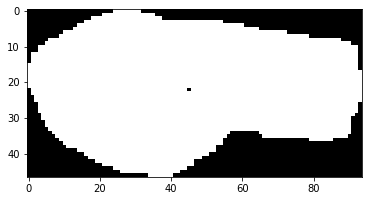

In [45]:
submask[c]=0
plt.imshow(submask, cmap='gray')

In [73]:
m

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

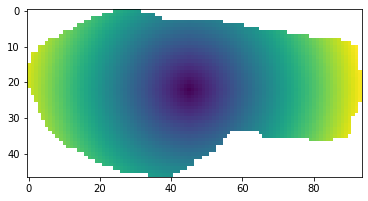

In [46]:
m_submask = ma.masked_array(submask, m)
distance = skfmm.distance(m_submask)
plt.imshow(distance)

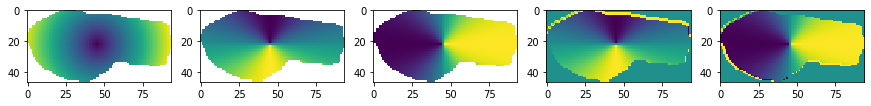

In [47]:
%matplotlib inline
g_dy, g_dx = np.gradient(distance, 1, edge_order=1)

mu_g = np.stack((g_dy,g_dx))
mu_g /= (1e-20 + (mu_g**2).sum(axis=0)**0.5)

plt.figure(figsize=(15,15))
plt.subplot(151)
plt.imshow(distance)
plt.subplot(152)
plt.imshow(g_dy)
plt.subplot(153)
plt.imshow(g_dx)
plt.subplot(154)
plt.imshow(mu_g[0,...])
plt.subplot(155)
plt.imshow(mu_g[1,...])

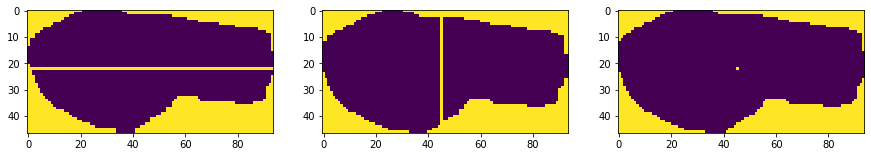

In [48]:
plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(mu_g[0,...]==0)
plt.subplot(132)
plt.imshow(mu_g[1,...]==0)
plt.subplot(133)
plt.imshow((mu_g[0,...]==0) & (mu_g[1,...]==0))

In [70]:
# %gui qt 
%matplotlib Qt5
plt.imshow(mu_g[0,...])
plt.show()

In [72]:
%matplotlib Qt5
plt.imshow(g_dx)
plt.show()

## test on single slice

### generate dP from mask

[ 0 29 31]
(slice(168, 249, None), slice(530, 614, None))


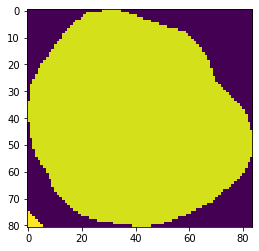

In [499]:
target = 28
masks = Y[0].copy()
slices = scipy.ndimage.find_objects(masks)
masks = masks[slices[target]]
print(np.unique(masks))
print(slices[target])
plt.imshow(masks)

In [500]:
%matplotlib inline
Ly, Lx = masks.shape
mu2 = np.zeros((2, Ly, Lx), np.float64)
# mu2 = np.full((2, Ly, Lx), 2, np.float64)

slices = scipy.ndimage.find_objects(masks)
# print(slices)
for i,si in enumerate(slices):
    if i == target:
#         print(si)
        sr,sc = si
        submask = masks[si]
        m = submask!=(i+1)
        y,x = np.nonzero(~m)
        centroid = scipy.ndimage.measurements.center_of_mass(submask, labels=submask, index=(i+1))
        c = tuple(np.round(np.array(centroid)).astype(int))
        submask[c]=0 # set the centroid to 0 as the for GDT
        m_submask = ma.masked_array(submask, m)
        
#         print((~m_submask.mask).sum())
        gdt = skfmm.distance(m_submask)
#         print((~gdt.mask).sum())
        g_dy, g_dx = np.gradient(gdt, 1, edge_order=1)
#         print((~g_dy.mask).sum())
#         g_dy2 = ma.masked_array(ma.filled(g_dy,0), gdt.mask, copy=True, hard_mask=True)
#         print((~g_dy2.mask).sum())
        smoothed_y = ma.masked_array(scipy.ndimage.uniform_filter(ma.filled(g_dy,0), size=3),m)
        smoothed_x = ma.masked_array(scipy.ndimage.uniform_filter(ma.filled(g_dx,0), size=3),m)
        mu2[:, sr.start+y, sc.start+x] = np.stack((smoothed_y.compressed(),smoothed_x.compressed()))
#         smoothed_x = scipy.ndimage.uniform_filter(ma.filled(g_dx,0), size=3)
#         g_dy2 = ma.masked_array(ma.filled(smoothed_y, 0), m, copy=True, hard_mask=True)
#         g_dx2 = ma.masked_array(smoothed_x, m, copy=True, hard_mask=True)

#         ## some border pixel will lost due to the gradient calculation between the masked pixel and border pixel
# #         mu2[:, sr, sc] = np.stack((ma.filled(g_dy,0), ma.filled(g_dx, 0)))
# #         g_dy, g_dx = np.gradient(ma.filled(gdt, 0), 1, edge_order=1)
#         mu2[:, sr, sc] = np.stack((g_dy2, g_dx2))
# smoothed_y

In [501]:
y.shape

(5007,)

In [502]:
mu2

array([[[ 2.        ,  2.        ,  2.        ,  2.        ,
          2.        ,  2.        ,  2.        ,  2.        ,
          2.        ,  2.        ,  2.        ,  2.        ,
          2.        ,  2.        ,  2.        ,  2.        ,
          2.        ,  2.        ,  2.        ,  2.        ,
          2.        ,  2.        ,  2.        ,  2.        ,
          2.        ,  2.        ,  2.        ,  2.        ,
         -0.63956912, -0.96228082, -0.96797564, -0.97327836,
         -0.97872364, -0.98554792, -0.65943705,  2.        ,
          2.        ,  2.        ,  2.        ,  2.        ,
          2.        ,  2.        ,  2.        ,  2.        ,
          2.        ,  2.        ,  2.        ,  2.        ,
          2.        ,  2.        ,  2.        ,  2.        ,
          2.        ,  2.        ,  2.        ,  2.        ,
          2.        ,  2.        ,  2.        ,  2.        ,
          2.        ,  2.        ,  2.        ,  2.        ,
          2.        ,  2

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


/home/lis-paul/miniconda3/envs/cellpose/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


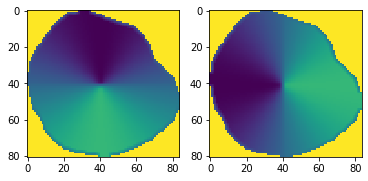

In [503]:
%pylab

plt.subplot(121)
plt.imshow(mu2[0,...])
plt.subplot(122)
plt.imshow(mu2[1,...])

In [385]:
# np.savetxt('g_dy', mu2[0, ...])
# np.savetxt('g_dx', mu2[1, ...])
np.savetxt('g_dy2', g_dy2)
np.savetxt('g_dx2', g_dx2)
np.savetxt('smoothed_y', smoothed_y)
np.savetxt('smoothed_x', smoothed_x)


In [374]:
np.savetxt('gdt', gdt)
np.savetxt('submask', submask)

### calculate p from dP

In [324]:
dP = np.stack((mu2[0, ...], mu2[1, ...]), axis=0)
dP = dP.astype('float32')
# p = dynamics.follow_flows(-1 * dP / 5  , niter=200)

dP2 = 1 * dP / 1
shape = np.array(dP2.shape[1:]).astype(np.int32)
niter = np.int32(50)
p = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), indexing='ij')
p = np.array(p).astype(np.float32)
# # run dynamics on subset of pixels
# inds = np.array(np.nonzero(np.abs(dP2[0])>1e-3)).astype(np.int32).T
inds = np.array(np.nonzero((np.abs(dP[0])>1e-3) | (np.abs(dP[1])>1e-3) )).astype(np.int32).T
# p = dynamics.steps2D(p, dP2, inds, niter)

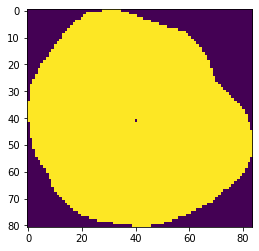

In [325]:
inds_arr = (np.abs(dP[0])>1e-3) | (np.abs(dP[1])>1e-3)
plt.imshow(inds_arr)

In [326]:
pp = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), indexing='ij')
pp = np.array(pp).astype(np.float32)
shape = pp.shape[1:]

for t in range(200):
    #pi = p.astype(np.int32)
    for j in range(inds.shape[0]):
        y = inds[j,0]
        x = inds[j,1]
        p0, p1 = int(pp[0,y,x]), int(pp[1,y,x])
        pp[0,y,x] = min(shape[0]-1, max(0, pp[0,y,x] - dP2[0,p0,p1]))
        pp[1,y,x] = min(shape[1]-1, max(0, pp[1,y,x] - dP2[1,p0,p1]))
        
#         if(y==48 and x==62):
#             print(y)
#             print(int(pp[0,y,x]), int(pp[1,y,x]))
#             print(pp[0,y,x], pp[1,y,x], dP2[0,p0,p1], dP2[1,p0,p1])
#             print(pp[1,y,x] - dP2[1,p0,p1])
#     y=48
#     x=62
#     p0, p1 = int(pp[0,y,x]), int(pp[1,y,x])
#     print(pp[0,y,x], pp[1,y,x], dP2[0,p0,p1], dP2[1,p0,p1])
    np.savetxt(f'output2/pys_{t}.txt', pp[0,...][sr,sc], delimiter=',')
    np.savetxt(f'output2/pxs_{t}.txt', pp[1,...][sr,sc], delimiter=',')

### get mask from p and dP

In [72]:
def test_getMask(p, iscell=None, rpad=20, flows=None, threshold=0.4):
    pflows = []
    edges = []
    shape0 = p.shape[1:]
    dims = len(p)
    if iscell is not None:
        if dims==3:
            inds = np.meshgrid(np.arange(shape0[0]), np.arange(shape0[1]),
                np.arange(shape0[2]), indexing='ij')
        elif dims==2:
            inds = np.meshgrid(np.arange(shape0[0]), np.arange(shape0[1]),
                     indexing='ij')
        for i in range(dims):
            p[i, ~iscell] = inds[i][~iscell]
        
    for i in range(dims):
        pflows.append(p[i].flatten().astype('int32'))
        edges.append(np.arange(-.5-rpad, shape0[i]+.5+rpad, 1))

    h,_ = np.histogramdd(tuple(pflows), bins=edges)
    hmax = h.copy()
    for i in range(dims):
        hmax = maximum_filter1d(hmax, 5, axis=i)
        
    seeds = np.nonzero(np.logical_and(h-hmax>-1e-6, h>10))
    Nmax = h[seeds]
    isort = np.argsort(Nmax)[::-1]
    for s in seeds:
        s = s[isort]

    pix = list(np.array(seeds).T)
    shape = h.shape
    if dims==3:
        expand = np.nonzero(np.ones((3,3,3)))
    else:
        expand = np.nonzero(np.ones((3,3)))
    for e in expand:
        e = np.expand_dims(e,1)
        
    for iter in range(1):
        for k in range(len(pix)):
            if iter==0:
                pix[k] = list(pix[k])
            newpix = []
            iin = []
            for i,e in enumerate(expand):

                epix = e[:,np.newaxis] + np.expand_dims(pix[k][i], 0) - 1
                epix = epix.flatten()
    #             iin.append(np.logical_and(epix>=0, epix<shape[i]))
                iin.append(np.logical_and(epix>=0, epix<76))
                newpix.append(epix)
            iin = np.all(tuple(iin), axis=0)
            print(newpix)
            for i,p in enumerate(newpix):
                newpix[i] = p[iin]
            print(newpix)

In [73]:
test_getMask(pp, iscell=cellprob2, rpad=20, flows=None, threshold=0.4)

[array([20, 20, 20, 21, 21, 21, 22, 22, 22]), array([51, 52, 53, 51, 52, 53, 51, 52, 53])]
[array([20, 20, 20, 21, 21, 21, 22, 22, 22]), array([51, 52, 53, 51, 52, 53, 51, 52, 53])]
[array([22, 22, 22, 23, 23, 23, 24, 24, 24]), array([76, 77, 78, 76, 77, 78, 76, 77, 78])]
[array([], dtype=int64), array([], dtype=int64)]
[array([22, 22, 22, 23, 23, 23, 24, 24, 24]), array([83, 84, 85, 83, 84, 85, 83, 84, 85])]
[array([], dtype=int64), array([], dtype=int64)]
[array([66, 66, 66, 67, 67, 67, 68, 68, 68]), array([29, 30, 31, 29, 30, 31, 29, 30, 31])]
[array([66, 66, 66, 67, 67, 67, 68, 68, 68]), array([29, 30, 31, 29, 30, 31, 29, 30, 31])]
[array([67, 67, 67, 68, 68, 68, 69, 69, 69]), array([28, 29, 30, 28, 29, 30, 28, 29, 30])]
[array([67, 67, 67, 68, 68, 68, 69, 69, 69]), array([28, 29, 30, 28, 29, 30, 28, 29, 30])]
[array([67, 67, 67, 68, 68, 68, 69, 69, 69]), array([75, 76, 77, 75, 76, 77, 75, 76, 77])]
[array([67, 68, 69]), array([75, 75, 75])]
[array([68, 68, 68, 69, 69, 69, 70, 70, 

In [327]:
from scipy.ndimage.filters import maximum_filter1d

cellprob2 = (mu2[0, ...]!=0) | (mu2[1, ...]!=0)
p = pp.copy()

iscell=cellprob2
# p=p2.copy()
rpad=20

pflows = []
edges = []
shape0 = p.shape[1:]
dims = len(p)
if dims==3:
    inds = np.meshgrid(np.arange(shape0[0]), np.arange(shape0[1]),
        np.arange(shape0[2]), indexing='ij')
elif dims==2:
    inds = np.meshgrid(np.arange(shape0[0]), np.arange(shape0[1]),
             indexing='ij')
for i in range(dims):
    p[i, ~iscell] = inds[i][~iscell]

In [328]:
pp.shape

(2, 81, 84)

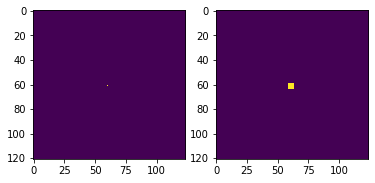

In [329]:
for i in range(dims):
    pflows.append(p[i].flatten().astype('int32'))
    edges.append(np.arange(-.5-rpad, shape0[i]+.5+rpad, 1))

h,_ = np.histogramdd(tuple(pflows), bins=edges)
hmax = h.copy()
for i in range(dims):
    hmax = maximum_filter1d(hmax, 5, axis=i)

plt.subplot(121)
plt.imshow(h)
plt.subplot(122)
plt.imshow(hmax)

In [330]:
h.shape, edges[0].shape, edges[1].shape 

((121, 124), (122,), (125,))

In [331]:
pp.shape[1:]

(81, 84)

In [332]:
seeds = np.nonzero(np.logical_and(h-hmax>-1e-6, h>10))
Nmax = h[seeds]
isort = np.argsort(Nmax)[::-1]
for s in seeds:
    s = s[isort]

pix = list(np.array(seeds).T)

In [245]:
h2 = np.logical_and(h-hmax>-1e-6, h>10).astype(int)
np.savetxt('h', h)
np.savetxt('hmax', hmax)
np.savetxt('h2', h2)

In [276]:
seeds

(array([48]), array([42]))

In [277]:
pix

[array([48, 42])]

In [17]:
np.nonzero(np.ones((3,3)))

(array([0, 0, 0, 1, 1, 1, 2, 2, 2]), array([0, 1, 2, 0, 1, 2, 0, 1, 2]))

In [333]:
shape = h.shape
if dims==3:
    expand = np.nonzero(np.ones((3,3,3)))
else:
    expand = np.nonzero(np.ones((3,3)))
print(expand)
for e in expand:
#     print(e)
    e = np.expand_dims(e,1)
print(expand)

(array([0, 0, 0, 1, 1, 1, 2, 2, 2]), array([0, 1, 2, 0, 1, 2, 0, 1, 2]))
(array([0, 0, 0, 1, 1, 1, 2, 2, 2]), array([0, 1, 2, 0, 1, 2, 0, 1, 2]))


In [292]:
expand

(array([0, 0, 0, 1, 1, 1, 2, 2, 2]), array([0, 1, 2, 0, 1, 2, 0, 1, 2]))

In [293]:
e

array([[0],
       [1],
       [2],
       [0],
       [1],
       [2],
       [0],
       [1],
       [2]])

In [249]:
pix[0], type(list(pix[0]))

(array([48, 42]), list)

In [250]:
pflows[0].shape, p.shape

((2793,), (2, 57, 49))

In [334]:
# %%debug
for iter in range(5):
    for k in range(len(pix)):
        if iter==0:
            pix[k] = list(pix[k])
        newpix = []
        iin = []
        for i,e in enumerate(expand):
#             print(i)
#             print(e)
#             print(pix[k])
            epix = e[:,np.newaxis] + np.expand_dims(pix[k][i], 0) - 1
#             print(epix)
            epix = epix.flatten()
#             print(epix)
            iin.append(np.logical_and(epix>=0, epix<shape[i]))
#             iin.append(np.logical_and(epix>=0, epix<70))
            newpix.append(epix)
        iin = np.all(tuple(iin), axis=0)
        for p in newpix:
#             print(p[iin])
            p = p[iin]
        newpix = tuple(newpix)

        igood = h[newpix]>2
#         print(h[newpix])
#         if (igood).any():
#             print(k)
#             print(pix[k])
#             print(epix)
#             print(igood)
#             print(newpix)
        print(pix[k])
        print(newpix)
        for i in range(dims):
            pix[k][i] = newpix[i][igood]
#         if (igood).any():
#             print("new pix")
#             print(pix[k])
#             pix[k] = tuple(pix[k])
        print(pix[k])

[61, 60]
(array([60, 60, 60, 61, 61, 61, 62, 62, 62]), array([59, 60, 61, 59, 60, 61, 59, 60, 61]))
[array([61]), array([60])]
[array([61]), array([60])]
(array([60, 60, 60, 61, 61, 61, 62, 62, 62]), array([59, 60, 61, 59, 60, 61, 59, 60, 61]))
[array([61]), array([60])]
[array([61]), array([60])]
(array([60, 60, 60, 61, 61, 61, 62, 62, 62]), array([59, 60, 61, 59, 60, 61, 59, 60, 61]))
[array([61]), array([60])]
[array([61]), array([60])]
(array([60, 60, 60, 61, 61, 61, 62, 62, 62]), array([59, 60, 61, 59, 60, 61, 59, 60, 61]))
[array([61]), array([60])]
[array([61]), array([60])]
(array([60, 60, 60, 61, 61, 61, 62, 62, 62]), array([59, 60, 61, 59, 60, 61, 59, 60, 61]))
[array([61]), array([60])]


In [335]:
pix[k] = tuple(pix[k])
M = np.zeros(h.shape, np.int32)
for k in range(len(pix)):
    print(pix[k])
    M[pix[k]] = 1+k

(array([61]), array([60]))


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


/home/lis-paul/miniconda3/envs/cellpose/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape', 'e', 'sample', 'imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


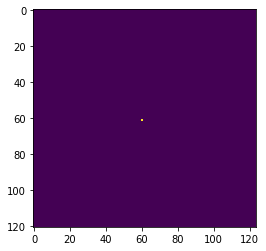

In [336]:
%pylab
plt.imshow(M)

In [337]:
for i in range(dims):
    pflows[i] = pflows[i] + rpad

In [338]:
np.nonzero(M)

(array([61]), array([60]))

In [295]:
pflows

[array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
        48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 20, 20, 20, 20, 20, 20, 20,
        20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21,
        21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 48, 48, 48, 48, 48, 48,
        48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 21, 21, 21, 21,
        21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22,
        22, 22, 22, 22, 22, 22, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48,
        48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 22, 22, 22,
        22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23,
        23, 23, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48,
        48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 23, 23, 23, 23,
        23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 48, 48, 48,
        48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48,
        48, 

In [339]:
M0 = M[tuple(pflows)]

In [340]:
M0.shape, M.shape

((6804,), (121, 124))

In [341]:
u,counts = np.unique(M0, return_counts=True)
print(u, counts)

[0 1] [1797 5007]


In [342]:
# remove big masks
big = shape0[0] * shape0[1] * 0.99
big

6735.96

In [343]:
for i in np.nonzero(counts > big)[0]:
    M0[M0==i] = 0
_,M0 = np.unique(M0, return_inverse=True)
M0 = np.reshape(M0, shape0)

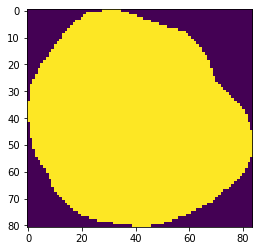

In [344]:
plt.imshow(M0)

In [165]:
from cellpose import metrics
np.set_printoptions(suppress=True)
flow_errors, dP_masks = metrics.flow_error(M0, -dP)
flow_errors

array([0.65439629])

In [163]:
plt.subplot(121)
plt.imshow(dP_masks[0, ...])
plt.subplot(122)
plt.imshow(dP_masks[1, ...])

In [164]:
np.savetxt('dPmask_y', dP_masks[0, ...])
np.savetxt('dPmask_x', dP_masks[1, ...])
np.savetxt('dP_y', dP[0,...])
np.savetxt('dP_x', dP[1,...])

In [193]:
M0 = np.reshape(M0, shape0)

if threshold is not None and threshold > 0 and flows is not None:
    M0 = remove_bad_flow_masks(M0, flows, threshold=threshold)
    _,M0 = np.unique(M0, return_inverse=True)
    M0 = np.reshape(M0, shape0).astype(np.int32)

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> <string>(2)<module>()



ipdb>  s


> <string>(3)<module>()



ipdb>  s


> <string>(4)<module>()



ipdb>  s


> <string>(5)<module>()



ipdb>  s


> <string>(6)<module>()



ipdb>  s


> <string>(7)<module>()



ipdb>  s


> <string>(8)<module>()



ipdb>  s


> <string>(9)<module>()



ipdb>  n


> <string>(10)<module>()



ipdb>  l


ipdb>  ll


*** could not get source code


ipdb>  s


> <string>(11)<module>()



ipdb>  s


> <string>(12)<module>()



ipdb>  s


> <string>(8)<module>()



ipdb>  s


> <string>(9)<module>()



ipdb>  s


--Call--
> <__array_function__ internals>(2)expand_dims()



ipdb>  s


> <__array_function__ internals>(4)expand_dims()



ipdb>  s


--Call--
> /home/lis-paul/miniconda3/envs/cellpose/lib/python3.7/site-packages/numpy/lib/shape_base.py(508)_expand_dims_dispatcher()
    506 
    507 
--> 508 def _expand_dims_dispatcher(a, axis):
    509     return (a,)
    510 



ipdb>  ll


--> 508 def _expand_dims_dispatcher(a, axis):
    509     return (a,)
    510 



ipdb>  n


> /home/lis-paul/miniconda3/envs/cellpose/lib/python3.7/site-packages/numpy/lib/shape_base.py(509)_expand_dims_dispatcher()
    507 
    508 def _expand_dims_dispatcher(a, axis):
--> 509     return (a,)
    510 
    511 



ipdb>  n


--Return--
(76,)
> /home/lis-paul/miniconda3/envs/cellpose/lib/python3.7/site-packages/numpy/lib/shape_base.py(509)_expand_dims_dispatcher()
    507 
    508 def _expand_dims_dispatcher(a, axis):
--> 509     return (a,)
    510 
    511 



ipdb>  n


> <__array_function__ internals>(5)expand_dims()



ipdb>  n


> <__array_function__ internals>(6)expand_dims()



ipdb>  n


--Return--
array([76])
> <__array_function__ internals>(6)expand_dims()



ipdb>  n


> <string>(10)<module>()



ipdb>  n


> <string>(11)<module>()



ipdb>  n


> <string>(12)<module>()



ipdb>  n


> <string>(8)<module>()



ipdb>  quit


## heat flow method on whole mask

In [12]:
masks = Y[0]
Ly, Lx = masks.shape
mu = np.zeros((2, Ly, Lx), np.float64)
slices = scipy.ndimage.find_objects(masks)
# print(slices)
for i,si in enumerate(slices):
    if si is not None:
        sr,sc = si
        ly, lx = sr.stop - sr.start + 1, sc.stop - sc.start + 1
        y,x = np.nonzero(masks[sr, sc] == (i+1))
        y = y.astype(np.int32) + 1
        x = x.astype(np.int32) + 1
        ymed = np.median(y)
        xmed = np.median(x)
        imin = np.argmin((x-xmed)**2 + (y-ymed)**2)
        xmed = x[imin]
        ymed = y[imin]

        niter = 2*np.int32(np.ptp(x) + np.ptp(y))
        T = np.zeros((ly+2)*(lx+2), np.float64)
        T = dynamics._extend_centers(T, y, x, ymed, xmed, np.int32(lx), niter)
        T[(y+1)*lx + x+1] = np.log(1.+T[(y+1)*lx + x+1])

        dy = T[(y+1)*lx + x] - T[(y-1)*lx + x]
        dx = T[y*lx + x+1] - T[y*lx + x-1]
        mu[:, sr.start+y-1, sc.start+x-1] = np.stack((dy,dx))
        mu /= (1e-20 + (mu**2).sum(axis=0)**0.5)
mu.shape

(2, 1022, 1022)

## GDT on whole mask image

In [8]:
mu,_ = dynamics.masks_to_flows(Y[0].copy())
mu2 = dynamics.masks_to_flows2(Y[0].copy())

In [13]:
masks = Y[0].copy()
Ly, Lx = masks.shape
mu2 = np.zeros((2, Ly, Lx), np.float64)
# slices = scipy.ndimage.find_objects(masks)[:1]
slices = scipy.ndimage.find_objects(masks)
# print(slices)
for i,si in enumerate(slices):
    if si is not None:
        sr,sc = si
#         m = masks[sr, sc]
        submask = masks[si]
        m = submask!=(i+1)
#         plt.imshow(masks[si])
#         plt.show()
        y,x = np.nonzero(~m)
        centroid = scipy.ndimage.measurements.center_of_mass(submask, labels=submask, index=(i+1))
        c = tuple(np.round(np.array(centroid)).astype(int))
        submask[c]=0 # set the centroid to 0 as the for GDT
        m_submask = ma.masked_array(submask, m)
#         plt.imshow(m_submask)
#         plt.show()
        gdt = skfmm.distance(m_submask)
#         print((~gdt.mask).sum())
        g_dy, g_dx = np.gradient(gdt, 1, edge_order=1)
#         print((~g_dy.mask).sum())
#         g_dy2 = ma.masked_array(ma.filled(g_dy,0), gdt.mask, copy=True, hard_mask=True)
#         print((~g_dy2.mask).sum())
        smoothed_y = ma.masked_array(scipy.ndimage.uniform_filter(ma.filled(g_dy,0), size=3),m)
        smoothed_x = ma.masked_array(scipy.ndimage.uniform_filter(ma.filled(g_dx,0), size=3),m)
        mu2[:, sr.start+y, sc.start+x] = np.stack((smoothed_y.compressed(),smoothed_x.compressed()))

In [14]:
# np.savetxt('g_dy', mu[0,...])
# np.savetxt('g_dx', mu[1,...])

# %matplotlib Qt5
# import matplotlib.pyplot as plt
# plt.imshow(mu2[1,...])
# plt.show()

### whole mask generate p from dP

In [5]:
dP = np.stack((mu2[0, ...], mu2[1, ...]), axis=0)
dP = dP.astype('float32')

dP2 = 1 * dP / 1
shape = np.array(dP2.shape[1:]).astype(np.int32)
niter = np.int32(50)
p = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), indexing='ij')
p = np.array(p).astype(np.float32)
inds = np.array(np.nonzero((np.abs(dP[0])>1e-3) | (np.abs(dP[1])>1e-3) )).astype(np.int32).T

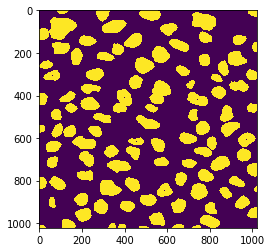

In [6]:
inds_arr = (np.abs(dP[0])>1e-3) | (np.abs(dP[1])>1e-3)
plt.imshow(inds_arr)

In [ ]:
%matplotlib inline
for i, si in enumerate(slices):
    print(i, si)
    sample = inds_arr[si]
    plt.imshow(sample)
    plt.show()

## Try reconstruct masks from flow (the geodesic distance tranformed dx,dy)

In [185]:
cellprob = (mu[0, ...]!=0) | (mu[1, ...]!=0)
cellprob2 = (mu2[0, ...]!=0) | (mu2[1, ...]!=0)

In [186]:
dP = np.stack((mu[0, ...], mu[1, ...]), axis=0)
dP = dP.astype('float32')
p = dynamics.follow_flows(-1 * dP  , niter=200)
maski = dynamics.get_masks(p, iscell=cellprob, flows=None, threshold=None)
maski = dynamics.fill_holes(maski)

dP2 = np.stack((mu2[0, ...], mu2[1, ...]), axis=0)
dP2 = dP2.astype('float32')
p2 = dynamics.follow_flows(1 * dP2  , niter=200)
maski2 = dynamics.get_masks(p2, iscell=cellprob2, flows=None, threshold=None)
maski2 = dynamics.fill_holes(maski2)

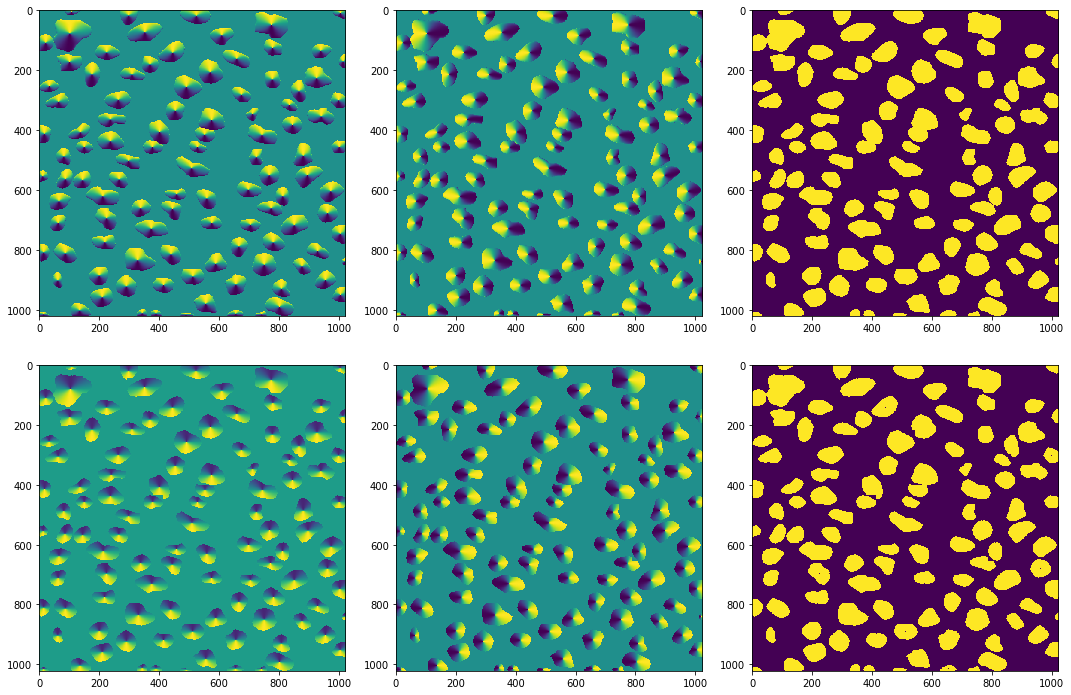

In [187]:
plt.figure(figsize=(15,10))
plt.subplot(231)
plt.imshow(mu[0, ...])
plt.subplot(232)
plt.imshow(mu[1, ...])
plt.subplot(233)
plt.imshow((mu[0, ...]!=0) | (mu[1, ...]!=0))
plt.subplot(234)
plt.imshow(mu2[0, ...])
plt.subplot(235)
plt.imshow(mu2[1, ...])
plt.subplot(236)
plt.imshow((mu2[0, ...]!=0) | (mu2[1, ...]!=0))
plt.tight_layout()

In [9]:
cellprob = (mu[0, ...]!=0) | (mu[1, ...]!=0)
cellprob2 = (mu2[0, ...]!=0) | (mu2[1, ...]!=0)

In [10]:
dP = np.stack((mu[0, ...], mu[1, ...]), axis=0)
dP = dP.astype('float32')
p = dynamics.follow_flows(-1 * dP  , niter=200)
maski = dynamics.get_masks(p, iscell=cellprob, flows=None, threshold=None)
maski = dynamics.fill_holes(maski)

dP2 = np.stack((mu2[0, ...], mu2[1, ...]), axis=0)
dP2 = dP2.astype('float32')
p2 = dynamics.follow_flows(1 * dP2  , niter=200)
maski2 = dynamics.get_masks(p2, iscell=cellprob2, flows=None, threshold=None)
maski2 = dynamics.fill_holes(maski2)

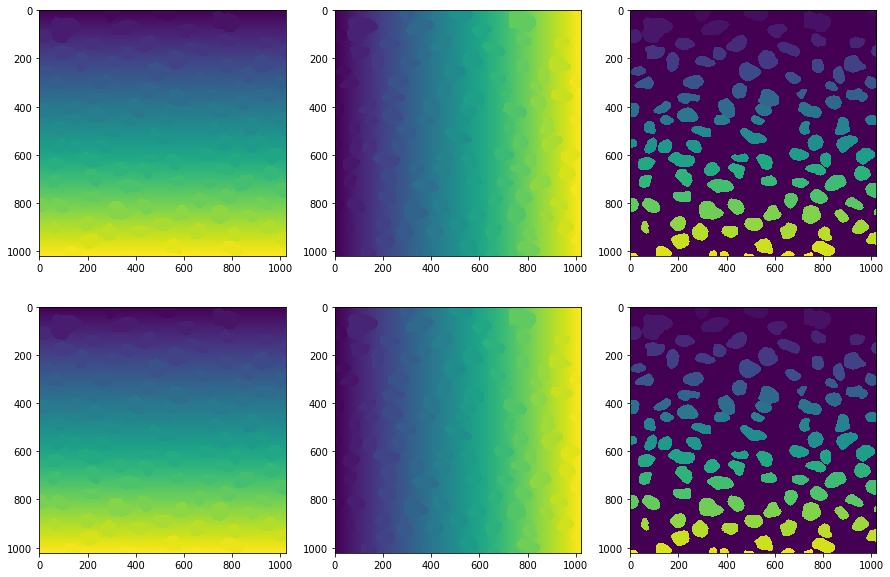

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(231)
plt.imshow(p[0, ...])
plt.subplot(232)
plt.imshow(p[1, ...])
plt.subplot(233)
plt.imshow(maski)
plt.subplot(234)
plt.imshow(p2[0, ...])
plt.subplot(235)
plt.imshow(p2[1, ...])
plt.subplot(236)
plt.imshow(maski2)

In [ ]:
for i, si in enumerate(slices):
    print(i, si)
    sample = maski2[si]
    plt.imshow(sample)
    plt.show()